In [1]:
#import libraries and warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data cleaning of APPLICATION_DATA

In [2]:
#read the files
file1=pd.read_csv('application_data.csv')
file1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
file2=pd.read_csv('previous_application.csv')
file2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#find shape
file1.shape

(307511, 122)

In [6]:
file1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
# checking no of null values
file1.isnull().sum().head(20)

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
dtype: int64

In [8]:
#checking percentage
file1.isnull().sum()/len(file1)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [9]:
#checking null value
file1.AMT_ANNUITY.isnull().sum()

12

In [10]:
#checking null values greater than 55%
null_col=file1.isnull().sum()/len(file1)*100
null_col=null_col[null_col.values>55.0]
null_col

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
BASEMENTAREA_MEDI           58.515956
YEARS_BUILD_MEDI            66.497784
COMMONAREA_MEDI             69.872297
FLOORSMIN_MEDI              67.848630
LANDAREA_MEDI               59.376738
LIVINGAPARTMENTS_MEDI       68.354953
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAREA_MEDI          55.179164
FONDKAPREMON

In [11]:
#dropping columns more than 55%
null_col = list(null_col[null_col.values>=50.0].index)
file1.drop(labels=null_col,axis=1,inplace=True)

In [12]:
#checking shape
file1.shape

(307511, 95)

#### AMT_ANNUITY

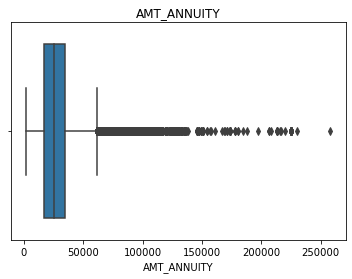

In [13]:
#plotting to check outliers 
plt.title('AMT_ANNUITY')
sns.boxplot(file1['AMT_ANNUITY'])
plt.show()

In [14]:
#describe AMT_ANNUITY
file1.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [15]:
#replacing with median values
med=file1['AMT_ANNUITY'].median()
file1['AMT_ANNUITY'].fillna(value=med,inplace=True)

In [16]:
#checking null values after replacing
file1.AMT_ANNUITY.isnull().sum()

0

In [17]:
file1.isnull().sum().head(30)

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE             

#### AMT_GOODS_PRICE

In [18]:
#check nulls
file1.AMT_GOODS_PRICE.isnull().sum()

278

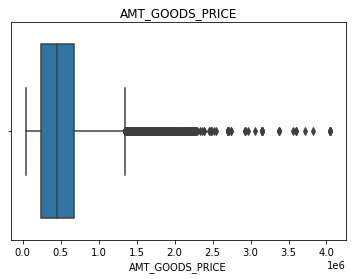

In [19]:
#analyze AMT_GOODS_PRICE  
plt.title('AMT_GOODS_PRICE')
sns.boxplot(file1['AMT_GOODS_PRICE'])
plt.show()

In [20]:
#description of AMT_GOODS_PRICE  
file1.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [21]:
# describe OCCUPATION_TYPE    
file1.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

#### CNT_FAM_MEMBERS

In [22]:
#describe CNT_FAM_MEMBERS   
file1.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [23]:
#check value counts
file1.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
16.0         2
14.0         2
20.0         2
12.0         2
15.0         1
11.0         1
13.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

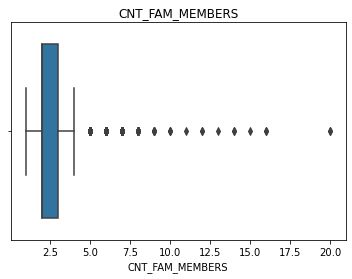

In [24]:
#plotting boxplot for CNT_FAM_MEMBERS   
plt.title('CNT_FAM_MEMBERS')
sns.boxplot(file1['CNT_FAM_MEMBERS'])
plt.show()

In [25]:
#filling NA with median
med2=file1['CNT_FAM_MEMBERS'].median()
file1['CNT_FAM_MEMBERS'].fillna(value=med2,inplace=True)

In [26]:
#checking null values
file1['CNT_FAM_MEMBERS'].isnull().sum()

0

#### CODE_GENDER

In [27]:
#analyze CODE_GENDER 
file1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [28]:
#replacing XNA with F as their number highest
file1.loc[file1['CODE_GENDER']=='XNA','CODE_GENDER']='F'
file1['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

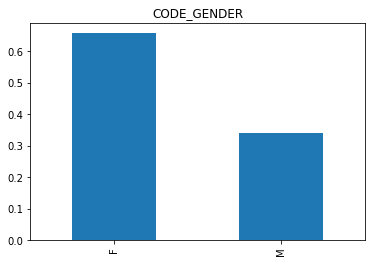

In [29]:
#plotting
plt.title('CODE_GENDER')
file1['CODE_GENDER'].value_counts(normalize=True).plot.bar()
plt.show()

In [30]:
#checking null
file1['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
file1['AMT_INCOME_TOTAL'].value_counts()

#### OCCUPATION_TYPE

Text(0.5, 1.0, 'OCCUPATION TYPE')

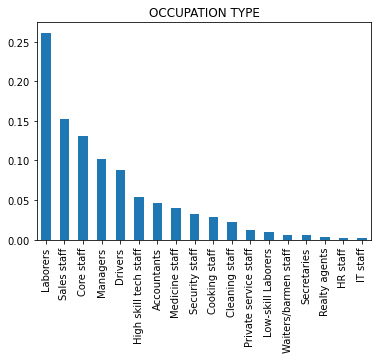

In [31]:
#check OCCUPATION_TYPE nulls with graph
file1['OCCUPATION_TYPE'].value_counts(normalize=True).plot.bar()
plt.title('OCCUPATION TYPE')

#### AMT_REQ_CREDIT_BUREAU_WEEK

In [32]:
#Handling null values of AMT_REQ_CREDIT_BUREAU_WEEK 
file1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

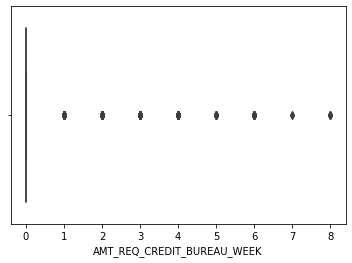

In [33]:
#plotting boxplot to check outliers
sns.boxplot(file1['AMT_REQ_CREDIT_BUREAU_WEEK'])
plt.show()

In [34]:
#checking mean,median &mode
file1['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [35]:
#filling NA with median
med3=file1['AMT_REQ_CREDIT_BUREAU_WEEK'].median()
file1['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value=med3,inplace=True)

In [36]:
file1['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [37]:
#Removing outliers
outliers=['AMT_REQ_CREDIT_BUREAU_WEEK']
for col in outliers:
    percentile=file1[col].quantile([0.001,0.099]).values
    file1[col][file1[col]>=percentile[1]]=percentile[1]
    file1[col][file1[col]<=percentile[0]]=percentile[0]

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_WEEK'>

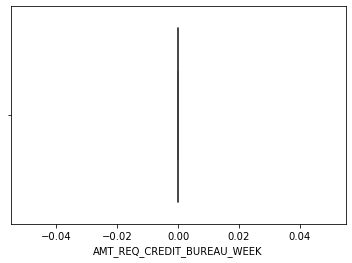

In [38]:
#After removing outliers
sns.boxplot(file1['AMT_REQ_CREDIT_BUREAU_WEEK'])

In [39]:
#checking the data types
file1.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 95, dtype: object

In [40]:
#CREATING BINS OF INCOME
bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,275000,300000,325000,375000,400000,425000,475000,500000,10000000000]
slot=['0-25000','25000-50000','50000-75000','75000-100000','100000-125000','125000-150000','150000-175000','175000-200000','200000-225000','225000-275000','275000-300000','300000-325000','325000-375000','375000-400000','400000-425000','425000-475000','475000-500000','500000 and above']
file1['INCOME_RANGE']=pd.cut(file1['AMT_INCOME_TOTAL'],bins,labels=slot)

In [41]:
#CREATING BINS FOR CREDIT
bins=[0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots=['0-150000','150000-200000','200000-250000','250000-300000','300000-350000','350000-400000','450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000','800000-850000','850000-900000','900000-950000','950000 and above']
file1['CREDIT_RANGE']=pd.cut(file1['AMT_CREDIT'],bins,labels=slots)

In [42]:
#dividing the dataset
#client0-->difficulty in paying, client1-->paid easily
client0=file1.loc[file1['TARGET']==0]
client1=file1.loc[file1['TARGET']==1]

In [43]:
#calculate imbalance
imbalancep=len(client0)/len(client1)
imbalancep

11.387150050352467

In [ ]:
?sns.set_style

In [ ]:
?sns.set_context

In [ ]:
?plt.yscale

In [ ]:
?sns.countplot

### Univariate analysis

In [44]:
def ploty(df,col,title,hue= None):
    sns.set_style('white')
    sns.set_context('notebook')
    a=pd.Series(data=hue)
    fig,ax=plt.subplots()
    plt.yscale('symlog')
    plt.title(title)
    ax=sns.countplot(data=df,x=col,hue=hue)
    plt.setp(ax.get_xticklabels(),rotation=45,ha='right',rotation_mode='anchor')
    plt.show()

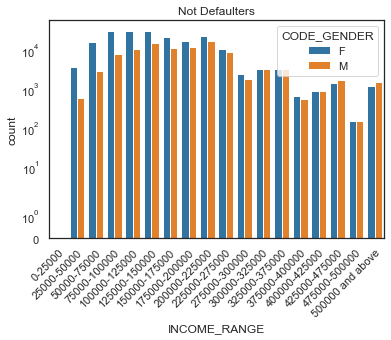

In [45]:
#plot for income range
ploty(client0, col='INCOME_RANGE',title='Not Defaulters',hue='CODE_GENDER')

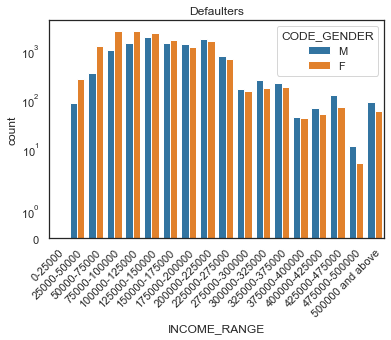

In [46]:
#plot for client1
ploty(client1,col='INCOME_RANGE',title='Defaulters',hue='CODE_GENDER')

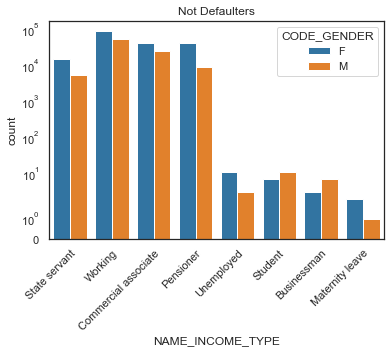

In [47]:
#plotting for INCOME_TYPE
ploty(client0,col='NAME_INCOME_TYPE',title='Not Defaulters',hue='CODE_GENDER')

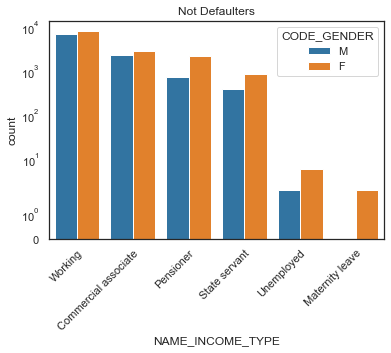

In [48]:
#plotting for INCOME_TYPE
ploty(client1,col='NAME_INCOME_TYPE',title='Not Defaulters',hue='CODE_GENDER')

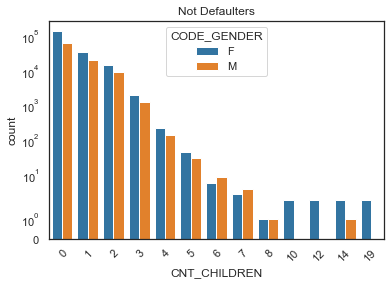

In [49]:
#plot for no of children for client0
ploty(client0,col='CNT_CHILDREN',hue='CODE_GENDER',title='Not Defaulters')

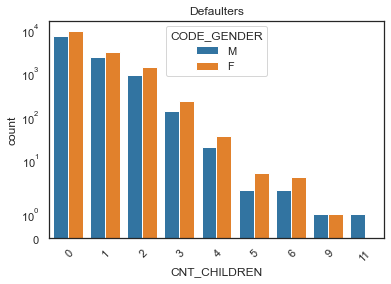

In [50]:
#plot for no of children for client 1
ploty(client1,col='CNT_CHILDREN',hue='CODE_GENDER',title='Defaulters')

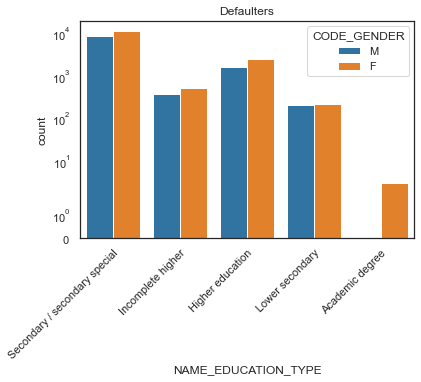

In [51]:
#plot for NAME_EDUCATION_TYPE  for client 1
ploty(client1,col='NAME_EDUCATION_TYPE',hue='CODE_GENDER',title='Defaulters')

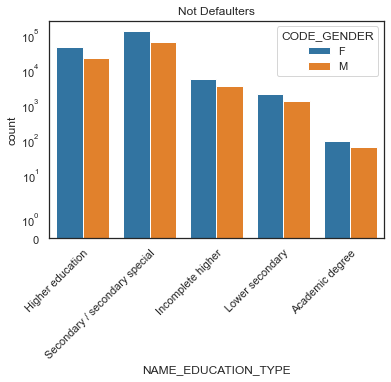

In [86]:
#plot for NAME_EDUCATION_TYPE  for client 0
ploty(client0,col='NAME_EDUCATION_TYPE',hue='CODE_GENDER',title='Not Defaulters')

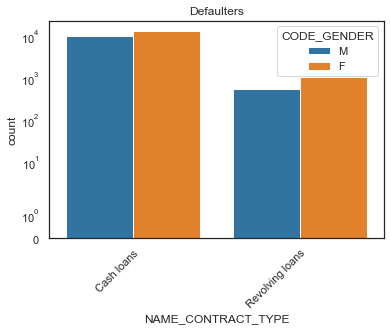

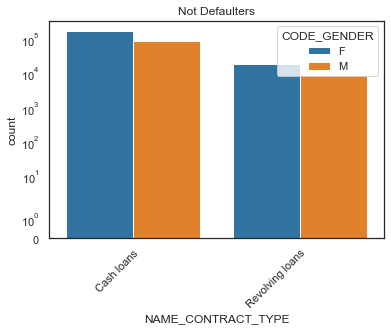

In [53]:
#plot for NAME_CONTRACT_TYPE for client 1
ploty(client1,col='NAME_CONTRACT_TYPE',hue='CODE_GENDER',title='Defaulters')
#plot for NAME_CONTRACT_TYPE  for client 0
ploty(client0,col='NAME_CONTRACT_TYPE',hue='CODE_GENDER',title='Not Defaulters')

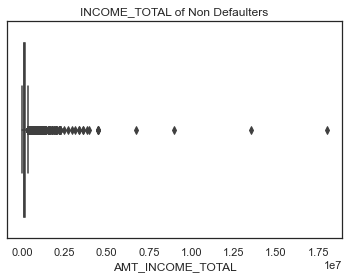

In [54]:
#plotting boxplot for 'INCOME_TOTAL' for client 0
sns.boxplot(data=client0,x='AMT_INCOME_TOTAL')
plt.title('INCOME_TOTAL of Non Defaulters')
plt.show()

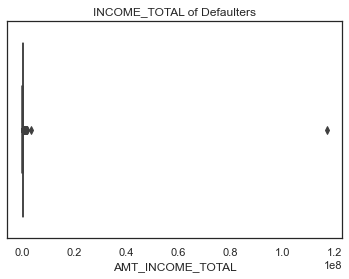

In [55]:
#plotting boxplot for 'INCOME_TOTAL' for client 1
sns.boxplot(data=client1,x='AMT_INCOME_TOTAL')
plt.title('INCOME_TOTAL of Defaulters')
plt.show()

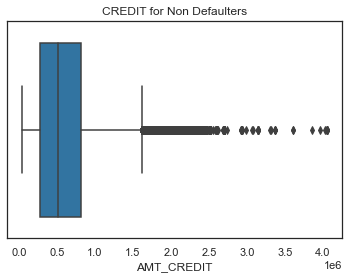

In [56]:
#plot boxplot for credit
sns.boxplot(data=client0,x='AMT_CREDIT')
plt.title('CREDIT for Non Defaulters')
plt.show()

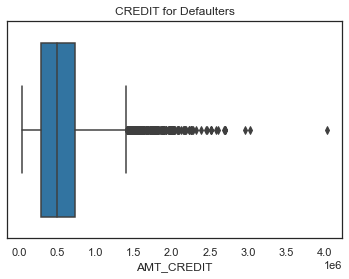

In [57]:
#plot boxplot for credit
sns.boxplot(data=client1,x='AMT_CREDIT')
plt.title('CREDIT for Defaulters')
plt.show()

### Bivariate analysis

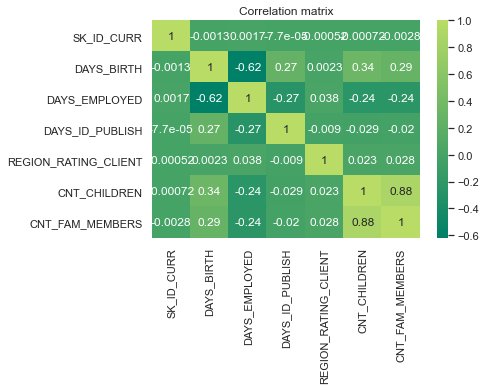

In [58]:
#plotting heatmap
maps=client0[['SK_ID_CURR','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','REGION_RATING_CLIENT','CNT_CHILDREN','CNT_FAM_MEMBERS']]
sns.heatmap(maps.corr(),cmap='summer',annot=True,center=0.5)
plt.title('Correlation matrix')
plt.show()

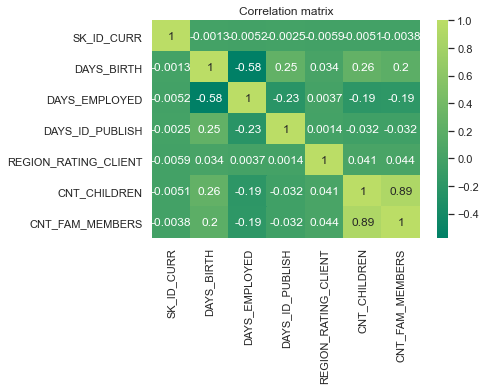

In [59]:
#plotting heatmap
maps=client1[['SK_ID_CURR','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','REGION_RATING_CLIENT','CNT_CHILDREN','CNT_FAM_MEMBERS']]
sns.heatmap(maps.corr(),cmap='summer',annot=True,center=0.5)
plt.title('Correlation matrix')
plt.show()

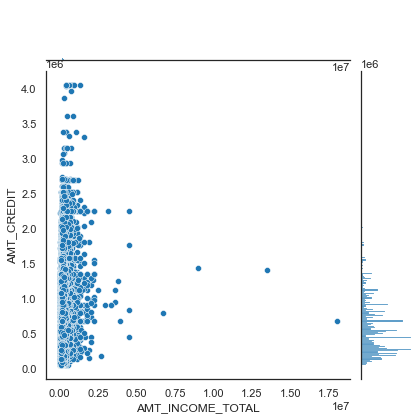

In [60]:
#plotting jointplots
sns.jointplot('AMT_INCOME_TOTAL','AMT_CREDIT',client0)
plt.show()

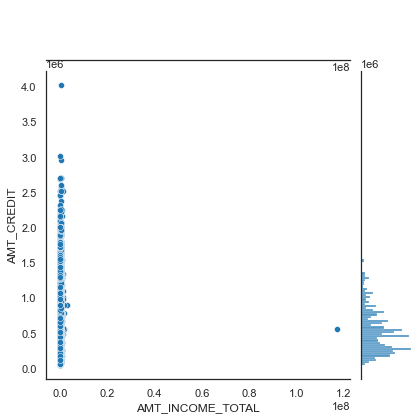

In [61]:
#plotting jointplots
sns.jointplot('AMT_INCOME_TOTAL','AMT_CREDIT',client1)
plt.show()

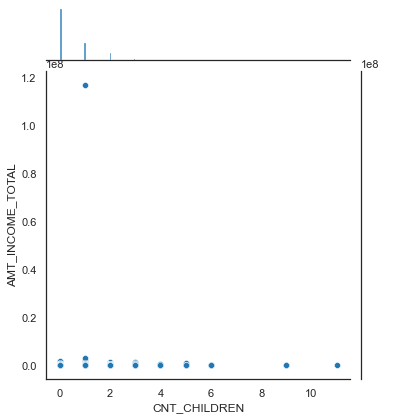

In [62]:
#jointplots for income and children
sns.jointplot('CNT_CHILDREN','AMT_INCOME_TOTAL',client1)
plt.show()

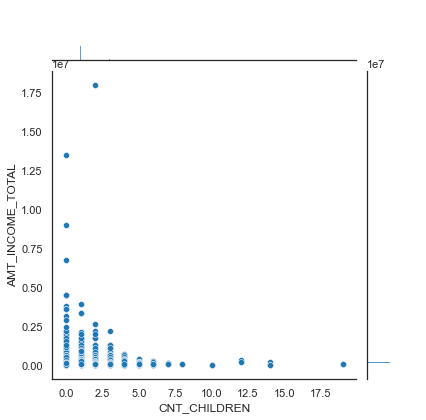

In [63]:
#jointplots for income and children
sns.jointplot('CNT_CHILDREN','AMT_INCOME_TOTAL',client0)
plt.show()

In [ ]:
?sns.catplot

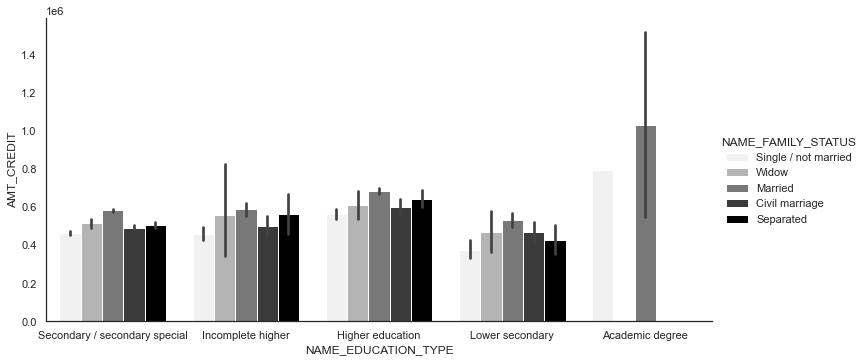

In [64]:
#catplot plotting for the following
sns.catplot(data=client1,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',aspect=2,kind='bar',color='black')
plt.show()

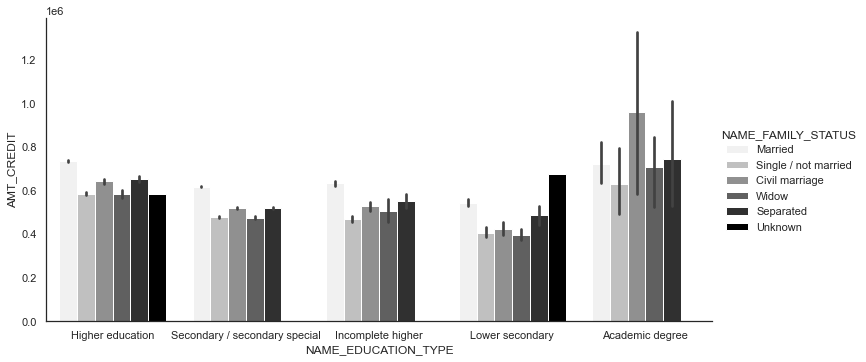

In [65]:
#plotting catplot
sns.catplot(data=client0,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',aspect=2,kind='bar',color='black')
plt.show()

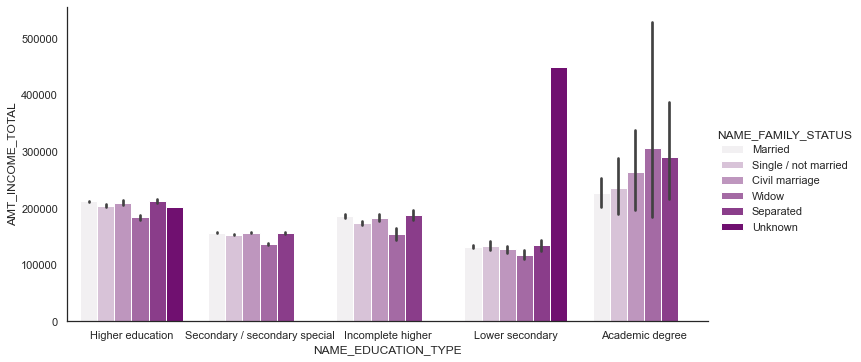

In [66]:
#plotting catplot
sns.catplot(data=client0,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',aspect=2,kind='bar',color='purple')
plt.show()

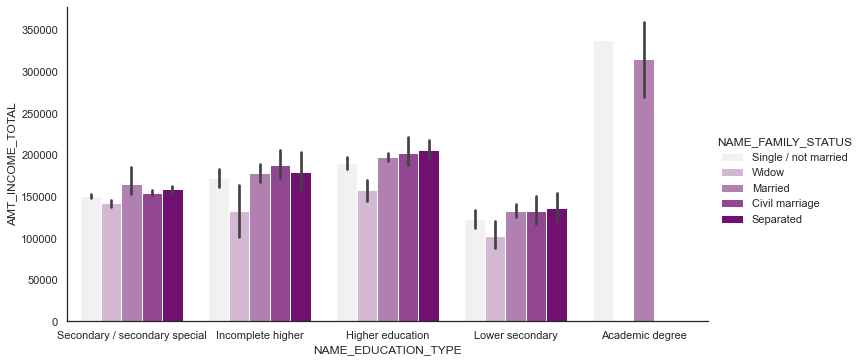

In [67]:
#plotting catplot
sns.catplot(data=client1,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',aspect=2,kind='bar',color='purple')
plt.show()

### PREVIOUS_APPLICATION Analysis

In [68]:
#reading the file
file2=pd.read_csv('previous_application.csv')
file2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#checking shape
file2.shape

(1670214, 37)

In [70]:
#info of file2
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [71]:
#description of file2
file2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [72]:
#data types 
file2.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [73]:
#checking null values
file2.isnull().sum()/len(file2)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [74]:
#checking null greater than 50%
remove_col=file2.isnull().sum()/len(file2)*100
remove_col=remove_col[remove_col.values>50.0]
remove_col

AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
dtype: float64

In [75]:
#dropping null>50
remove_col = list(remove_col[remove_col.values>50.0].index)
file2.drop(labels=remove_col,axis=1,inplace=True)

In [76]:
#checking shape
file2.shape

(1670214, 33)

In [77]:
file2.NAME_SELLER_INDUSTRY.value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [78]:
#dropping XNA from NAME_SELLER_INDUSTRY
file2=file2.drop(file2[file2['NAME_SELLER_INDUSTRY']=='XNA'].index)
file2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
13,1397919,321676,Consumer loans,7654.860,53779.5,57564.0,53779.5,SUNDAY,15,Y,...,Consumer electronics,8.0,low_action,POS household without interest,365243.0,-378.0,-168.0,-168.0,-163.0,1.0
14,2273188,270658,Consumer loans,9644.220,26550.0,27252.0,26550.0,SATURDAY,10,Y,...,Consumer electronics,3.0,middle,POS household with interest,365243.0,-693.0,-633.0,-633.0,-627.0,0.0
15,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,126490.5,TUESDAY,7,Y,...,Industry,6.0,low_normal,POS other with interest,365243.0,-668.0,-518.0,-518.0,-512.0,0.0
16,2163253,154602,Consumer loans,4187.340,26955.0,27297.0,26955.0,SATURDAY,12,Y,...,Consumer electronics,8.0,high,POS household with interest,365243.0,-1440.0,-1230.0,-1230.0,-1226.0,0.0


In [79]:
#merging 2 datasets
merging=pd.merge(left=file1,right=file2,how='inner',on='SK_ID_CURR')

In [80]:
#displaying head of merged dataset
merging.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Consumer electronics,12.0,high,POS household with interest,365243.0,-281.0,49.0,365243.0,365243.0,0.0


In [81]:
#removing few cols
merging.drop(['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY',
              'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [82]:
#checking the shape after dropped
merging.shape

(698379, 121)

In [90]:
file2=file2.drop(file2[file2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
file2=file2.drop(file2[file2['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

### Univariate analysis

In [83]:
?sns.set_context

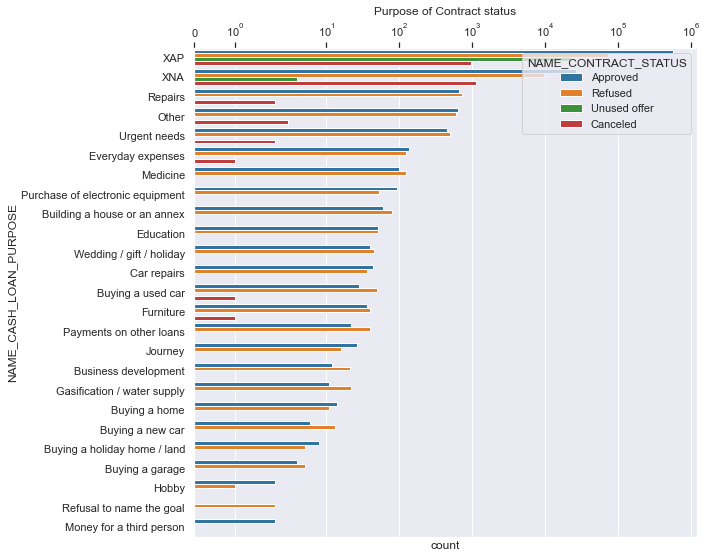

In [92]:
sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize=(9,9))
plt.title('Purpose of Contract status')
plt.xscale('symlog')
ax=sns.countplot(data=merging,y='NAME_CASH_LOAN_PURPOSE',orient='h',order=merging['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue='NAME_CONTRACT_STATUS')
ax.xaxis.tick_top()

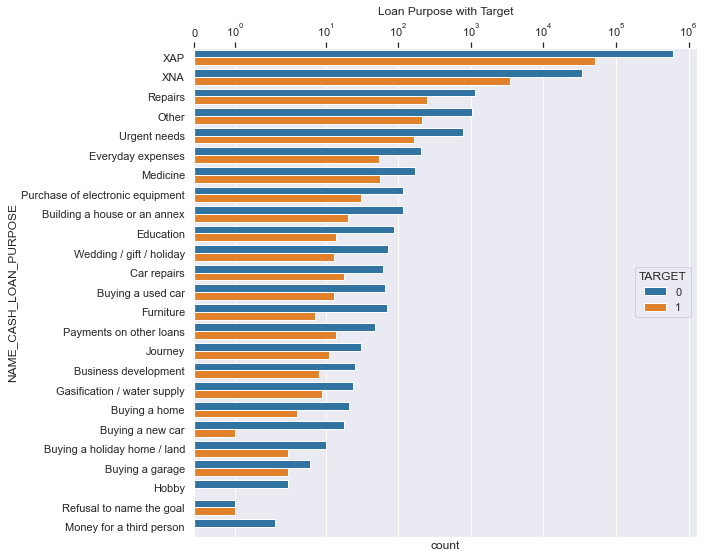

In [89]:
sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize=(9,9))
plt.title('Loan Purpose with Target')
plt.xscale('symlog')
ax=sns.countplot(data=merging,y='NAME_CASH_LOAN_PURPOSE',orient='h',order=merging['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue='TARGET')
ax.xaxis.tick_top()